In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = np.loadtxt("11-29_RC.csv", delimiter=",", skiprows=1)

In [3]:
t = data[:,0]
Vin = data[:,1]
Vout = data[:,2]

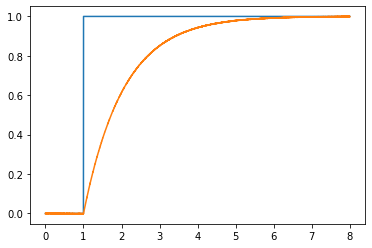

In [4]:
plt.plot(t, Vin)
plt.plot(t, Vout)

In [10]:
mask = t > 1
t = t[mask]
t -= t[0]
Vout = Vout[mask]

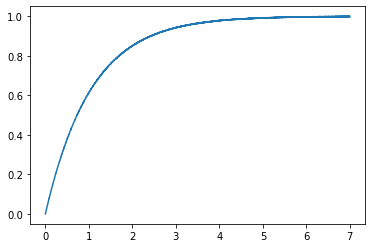

In [11]:
plt.plot(t, Vout)

In [22]:
y = -np.log(1 - Vout)

/tmp/ipykernel_16623/2161159758.py:1: RuntimeWarning: invalid value encountered in log
  y = -np.log(1 - Vout)


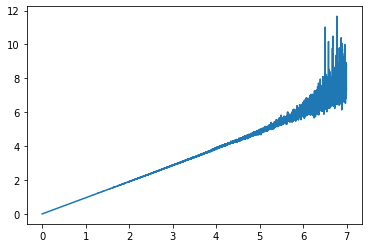

In [23]:
plt.plot(t, y)

In [24]:
mask = ~np.isnan(y)
y_fix = y[mask]
t_fix = t[mask]

In [25]:
A = t_fix.reshape(-1, 1)
A

array([[0.000e+00],
       [1.000e-03],
       [2.000e-03],
       ...,
       [6.994e+00],
       [6.995e+00],
       [6.998e+00]])

In [26]:
x = np.linalg.inv(A.T @ A) @ A.T @ y_fix
x

array([1.00142173])

In [28]:
tau = 1 / x[0]
tau

0.9985802893110796

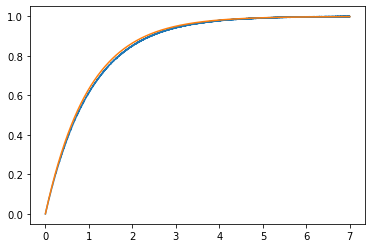

In [29]:
plt.plot(t, Vout)
plt.plot(t, 1 - np.exp(-t / tau))